# Визуализация данных

В этой тетрадке рассмотрим простые, но эффективные способы визуализации данных.

Импортируем библиотеки:

In [1]:
# Эта строчка нужна для того, чтобы выводить визуализации внутри тетрадки
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt # pyplot предоставляет простое API, ориентированное на последовательное изменение состояний элементов диаграммы
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot

import seaborn as sns


Загрузим датасет

In [2]:
df = sns.load_dataset('iris')

In [18]:
df.loc[df.groupby(['species'])['sepal_length'].idxmax().values]

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
135,8.0,7.9,6.1,2.3,virginica


In [20]:
df.sort_values('sepal_length',ascending=False).drop_duplicates(subset=['species'])

,sepal_length,sepal_width,petal_length,petal_width,species
135,8.0,7.9,6.1,2.3,virginica
50,7.0,3.2,4.7,1.4,versicolor
14,5.8,4.0,1.2,0.2,setosa


In [14]:
df.loc[135,'sepal_length'] = 8.0

In [16]:
df.sort_values('sepal_length',ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
135,8.0,7.9,6.1,2.3,virginica
131,7.9,3.8,6.4,2.0,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


Посмотрим первые строки датасета

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


В pandas есть масса встроенных методов, позволяющих строить простые визуализации.

Для более подробного ознакомления с возможностями рекомендую посмотреть страницу https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### Метод `hist()` для построения гистограммы

Один из простейших методов [`hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) позволяет построить гистограммы по колонкам

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e029cf8>,
      dtype=object)

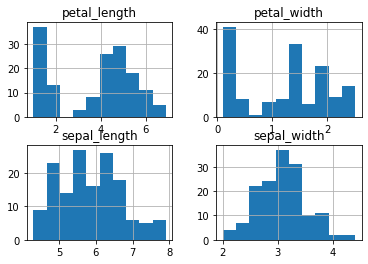

In [4]:
df.hist()

Выглядит мелковато, поэтому с помощью параметра `figsize` увеличим размеры фигуры (размеры указываются в дюймах: ширина, высота)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e1426d8>,
      dtype=object)

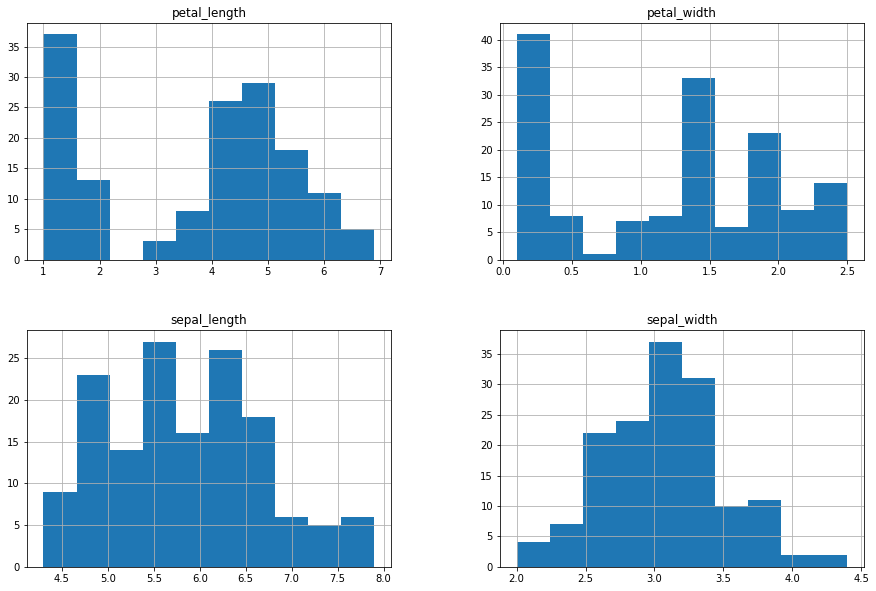

In [5]:
df.hist(figsize=(15,10))

Выше вывели гистограммы для всех колонок датафрейма, но также метод `hist()` можно применить для Series

Параметр `range` позволяет установить границы для построения гистограммы

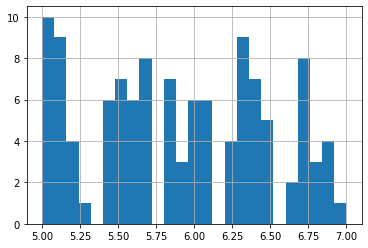

In [6]:
df['sepal_length'].hist(range=(5,7),bins=25)

Если хочется, то можно построить две гистограммы по выбранным колонкам

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e9e6128>,
      dtype=object)

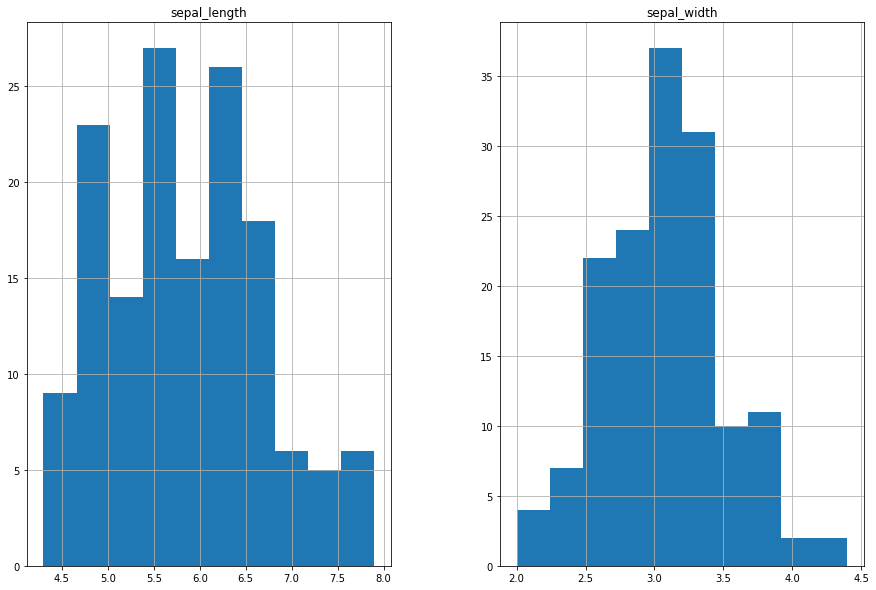

In [7]:
df[['sepal_length','sepal_width']].hist(figsize=(15,10))

При этом если вызвать два метода `hist()` к разным Series последовательно, то гистограммы будут построены на одной плоскости

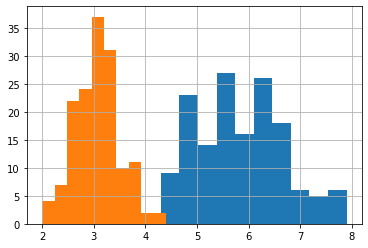

In [8]:
df['sepal_length'].hist()
df['sepal_width'].hist()

Немного подтюним визуализацию

Text(0.5, 1.0, 'Вот так вот')

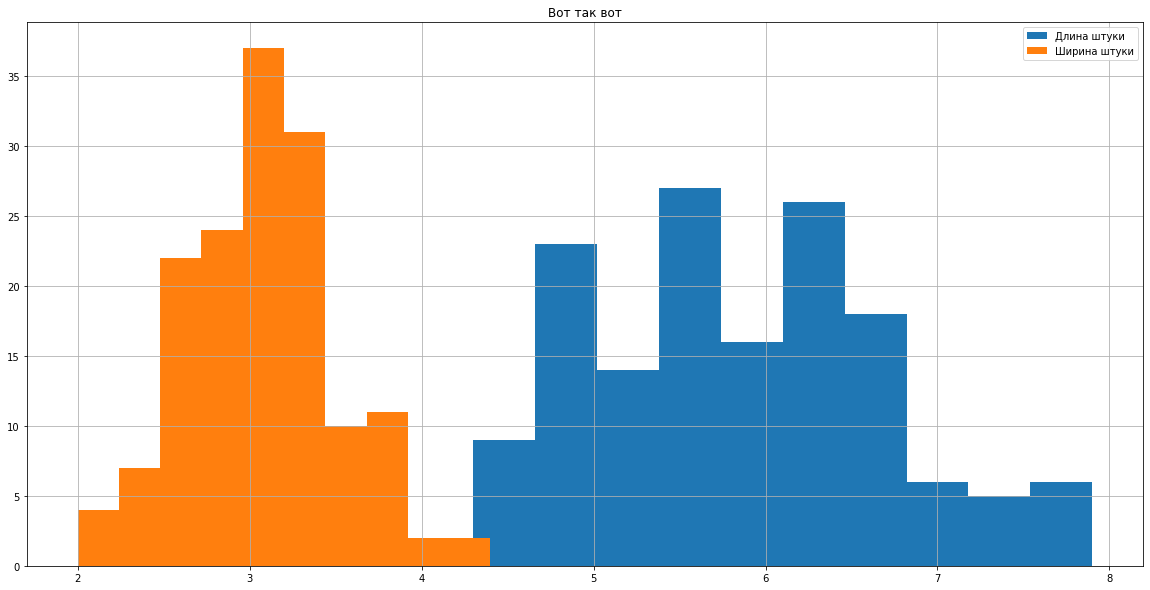

In [9]:
plt.figure(figsize=(20,10)) # Сделаем больше размеры фигуры
df['sepal_length'].hist(label='Длина штуки') # Добавим к каждой из гистограмм название
df['sepal_width'].hist(label='Ширина штуки')
plt.legend(loc='upper right') # Укажем отображение легенды
plt.title('Вот так вот') # Укажем название фигуры

И еще небольшое изменение

Text(0.5, 1.0, 'Вот так вот')

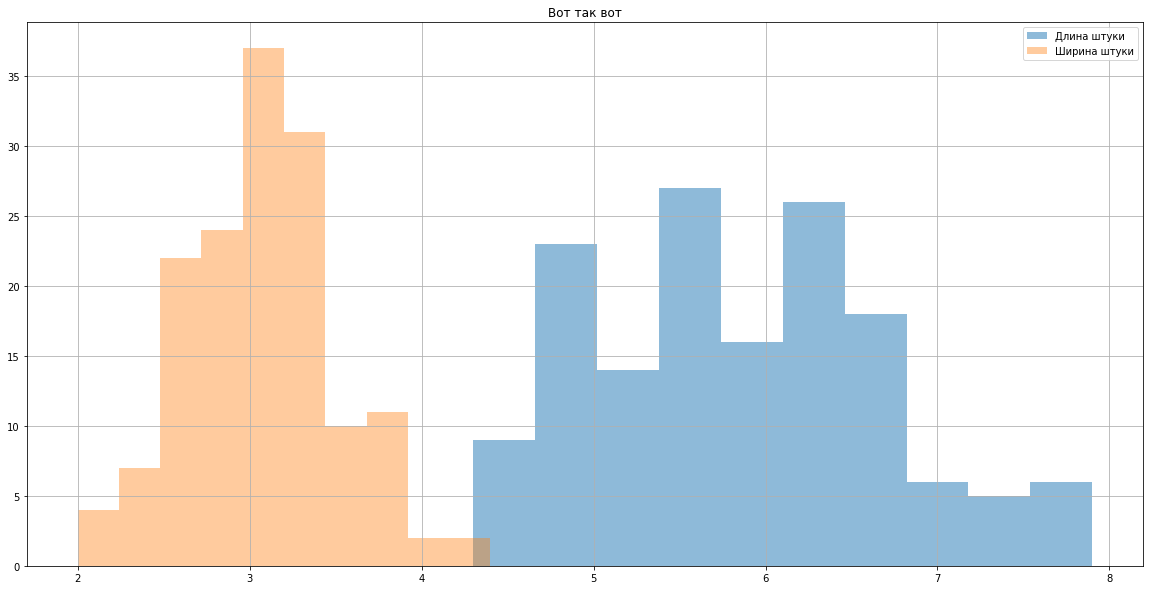

In [10]:
plt.figure(figsize=(20,10))
df['sepal_length'].hist(label='Длина штуки', alpha=0.5) # Сделаем прозрачность гистограмм, чтобы увидеть где они накладываются
df['sepal_width'].hist(label='Ширина штуки', alpha=0.4)
plt.legend(loc='upper right')
plt.title('Вот так вот')

### Метод `box()` для построения ящика с усами

Различные визуализации доступны как методы, вызываемые из ацессора `plot`.

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

Существует два способа вызова этих методов:
- Через ацессор `plot` -- `df.plot.box()`
- Через параметр `kind` в методе `plot()` -- `df.plot(kind='box')`

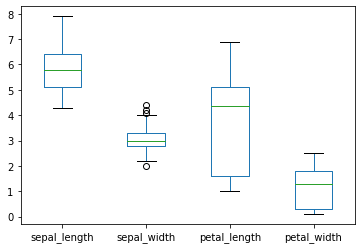

In [11]:
df.plot.box()

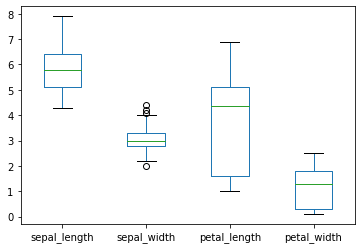

In [12]:
df.plot(kind='box')

Можно построить бокс-плоты по выбранным колонкам

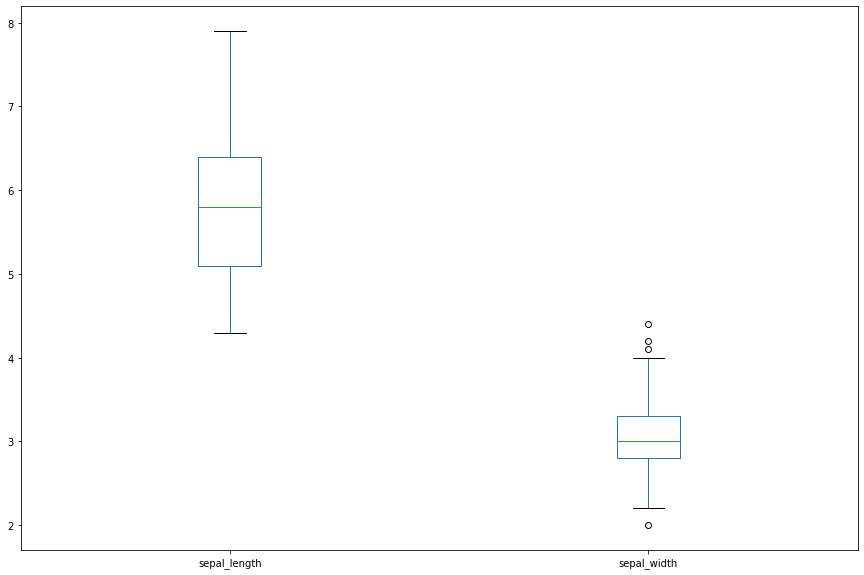

In [13]:
df[['sepal_length','sepal_width']].plot(kind='box',figsize=(15,10))

В наших данных есть категорийная переменная `species`. Поэтому построим для каждой категории свои бокс-плоты. Для этого можно использовать циклы

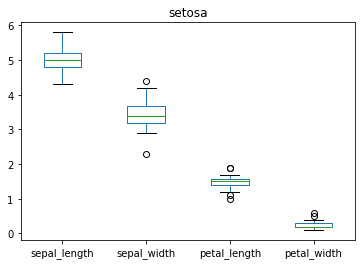

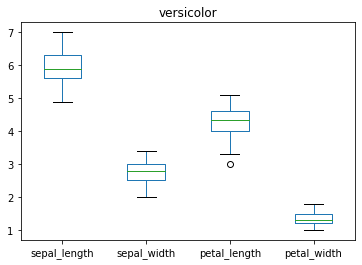

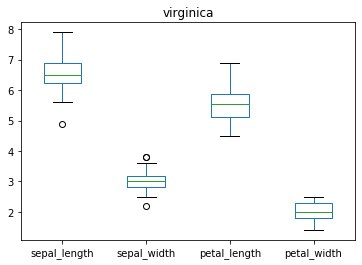

In [14]:
for specie in df['species'].unique():
    df[df['species'] == specie].plot.box()
    plt.title(specie)

Аналогичное можно сделать через `groupby()`

setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

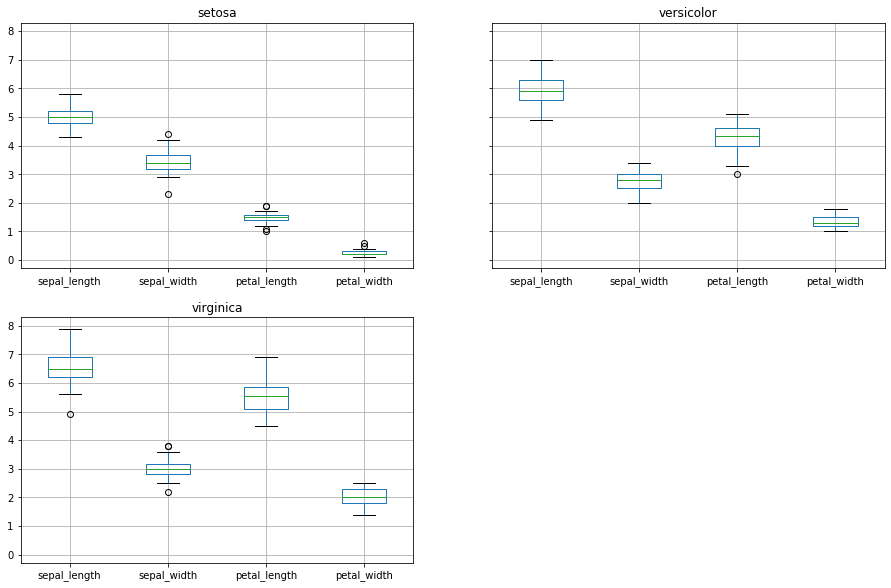

In [40]:
df.groupby('species').boxplot(figsize=(15,10))

# Метод `kde()` для построения графика плотности распределения

Для определения характеристик распределения полезно пострить график плотности распределения.

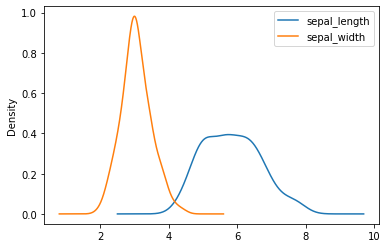

In [15]:
df[['sepal_length','sepal_width']].plot.kde()

Можно также построить графики плотности по группам

species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

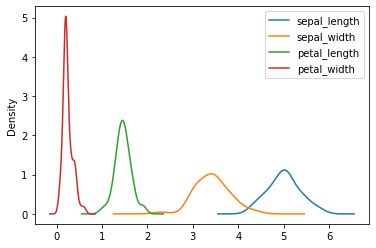

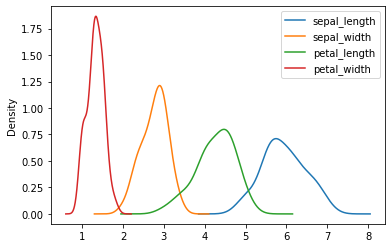

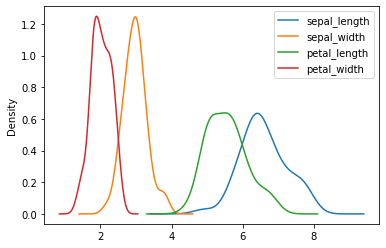

In [59]:
df.groupby('species').plot.kde()

Или даже вот так:

species
setosa        [AxesSubplot(0.125,0.71587;0.775x0.16413), Axe...
versicolor    [AxesSubplot(0.125,0.71587;0.775x0.16413), Axe...
virginica     [AxesSubplot(0.125,0.71587;0.775x0.16413), Axe...
dtype: object

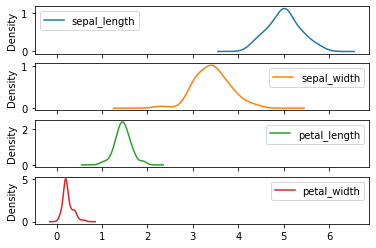

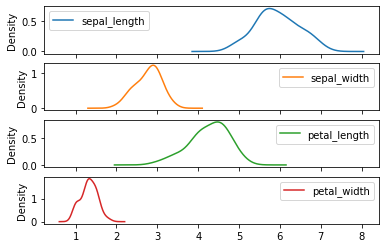

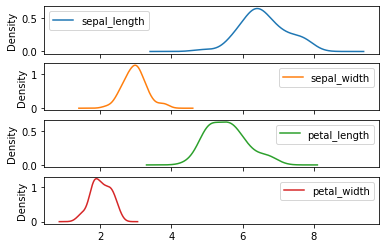

In [47]:
df.groupby('species').plot.density(subplots=True)

Особенно удобно строить график плотности распределения вместе с боксплотами. Можно даже поместить их на одной плоскости с помощью `subplots`

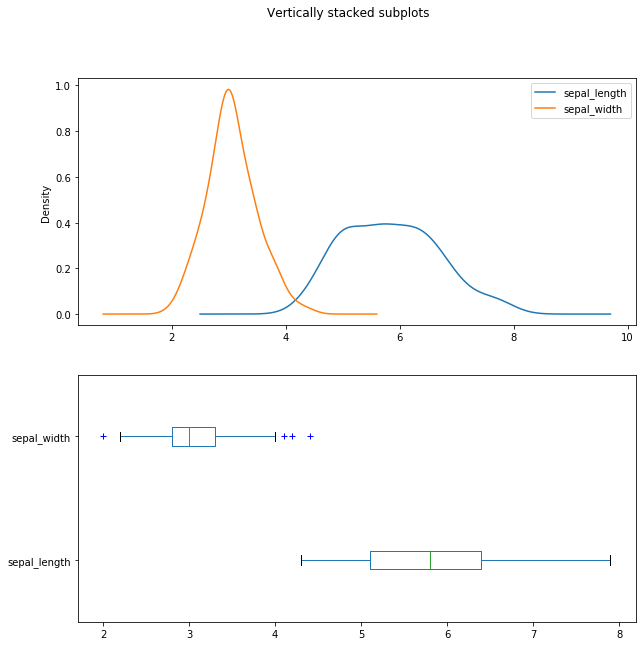

In [60]:
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Vertically stacked subplots')
df[['sepal_length','sepal_width']].plot.kde(ax=axs[0])
df[['sepal_length','sepal_width']].plot(kind='box',vert=False,ax=axs[1],sym='b+')

### Метод `scatter()` для построения диаграммы рассеяния

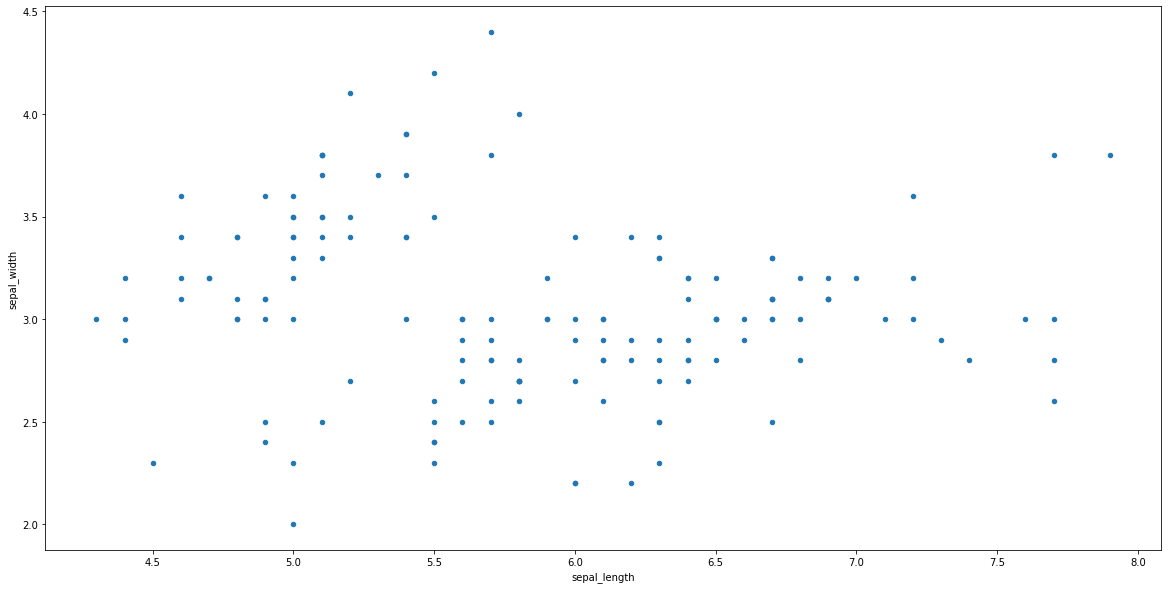

In [68]:
df.plot.scatter(x='sepal_length',y='sepal_width',figsize=(20,10))

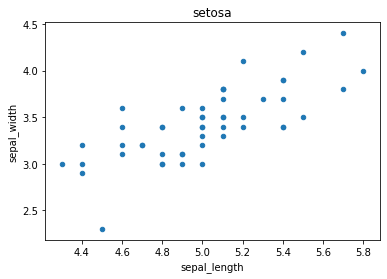

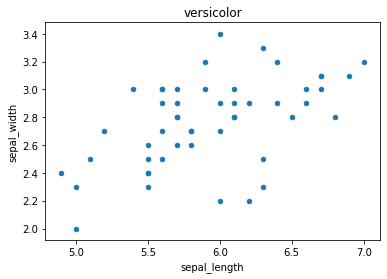

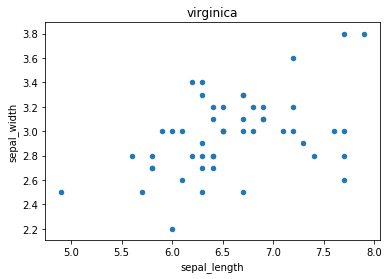

In [18]:
for specie in df['species'].unique():
    df[df['species'] == specie].plot.scatter(x='sepal_length',y='sepal_width')
    plt.title(specie)

In [19]:
# df.plot.scatter(x='sepal_length',y='sepal_width',s='petal_length',figsize=(20,10))

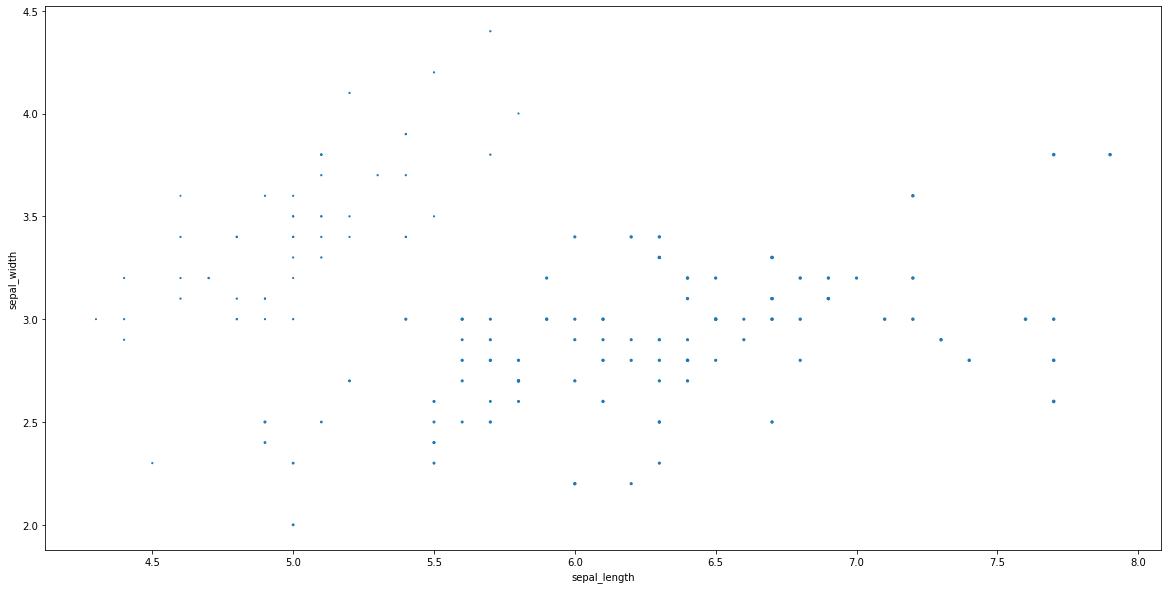

In [20]:
df.plot.scatter(x='sepal_length',y='sepal_width',s=df['petal_length'],figsize=(20,10))

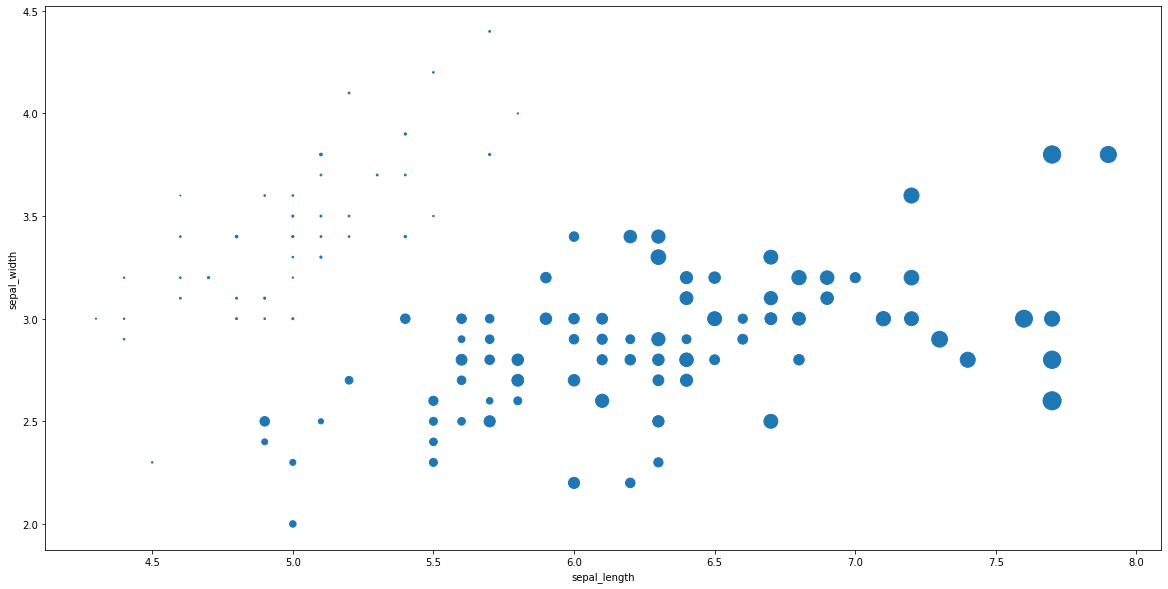

In [21]:
df.plot.scatter(x='sepal_length',y='sepal_width',s=np.power(df['petal_length'],3),figsize=(20,10))

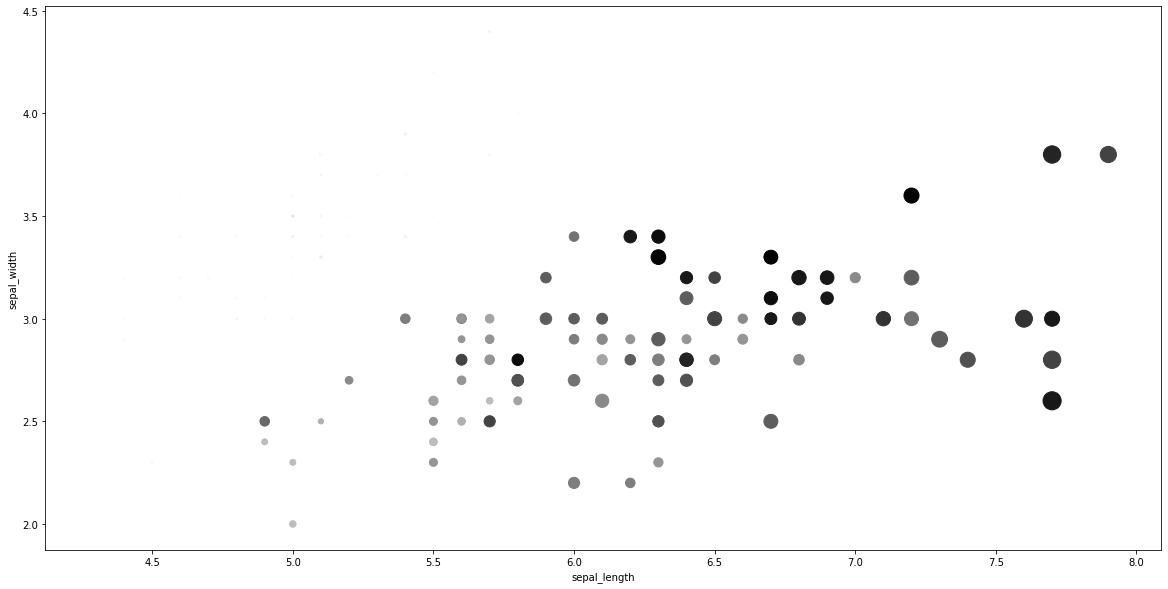

In [22]:
df.plot.scatter(x='sepal_length',y='sepal_width',s=np.power(df['petal_length'],3),
                figsize=(20,10),
               c=df['petal_width'])

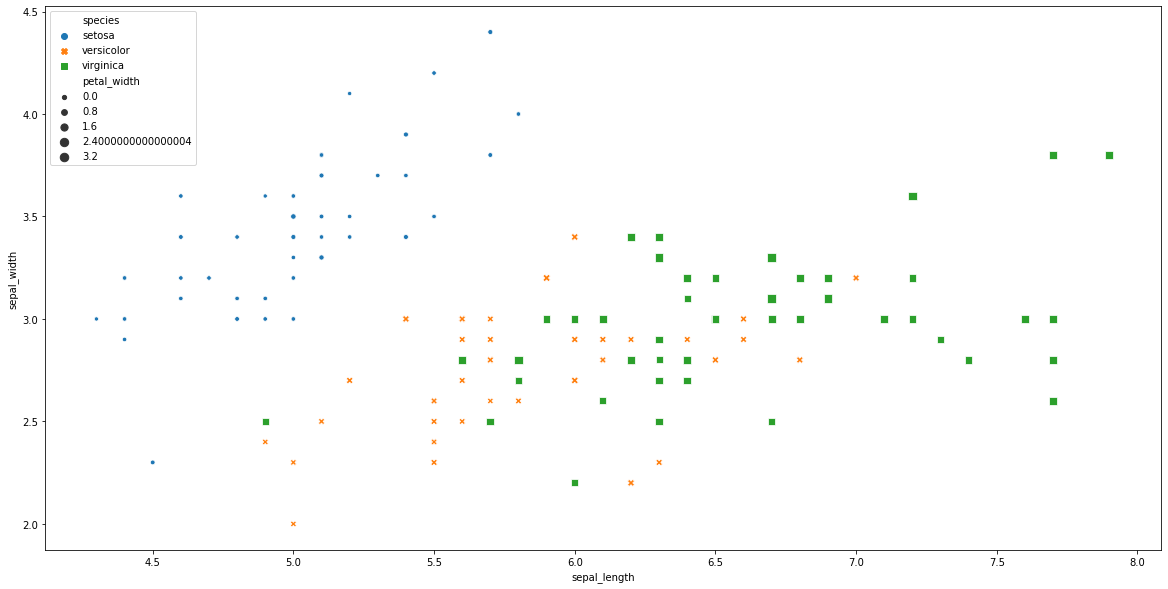

In [23]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species',size='petal_width',style='species')


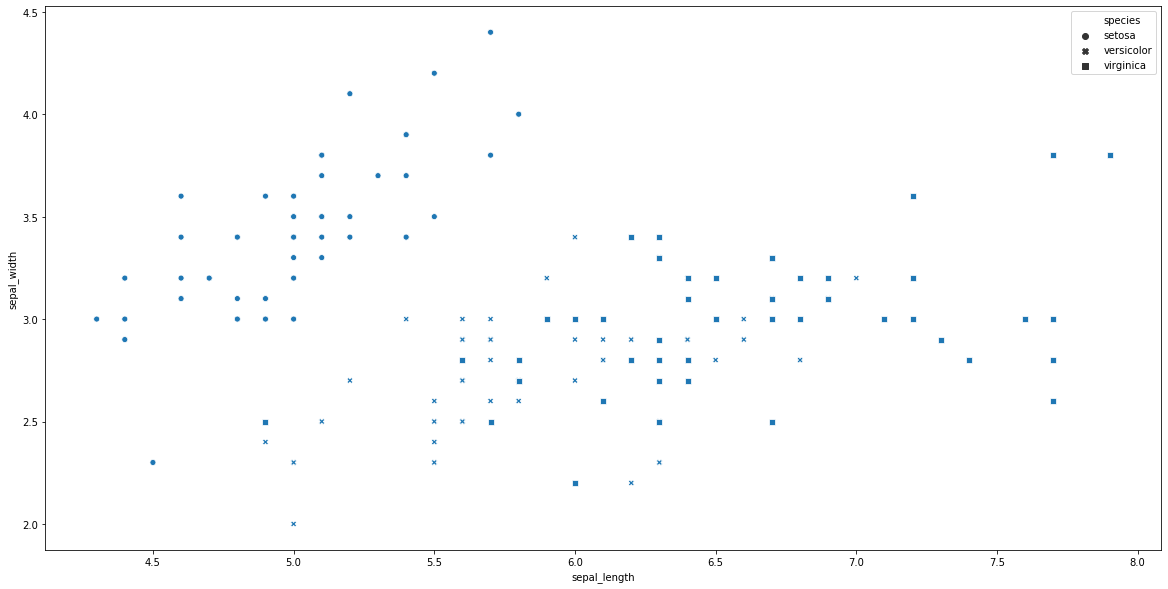

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',style='species')
plt.savefig(fname = 'abc.png')

### Метод `line()` для линейных графиков

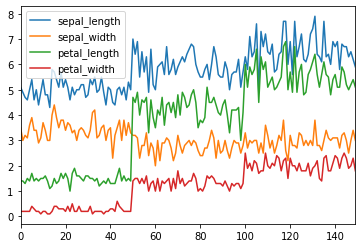

In [25]:
df.plot.line()

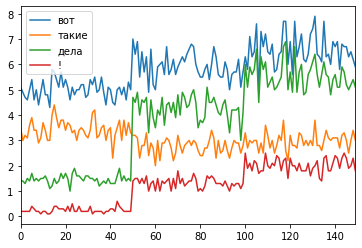

In [26]:
df.plot.line()
plt.legend(['вот','такие','дела','!'])

### Метод `bar()` для столбчатой диаграммы

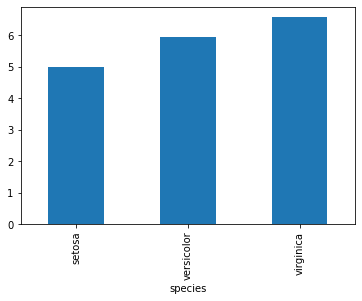

In [27]:
df.groupby(['species'])['sepal_length'].mean().plot.bar()

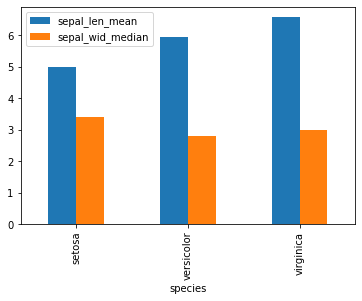

In [81]:
df.groupby(['species']).agg(sepal_len_mean=('sepal_length','mean'),
                           sepal_wid_median=('sepal_width','median')).plot.bar()

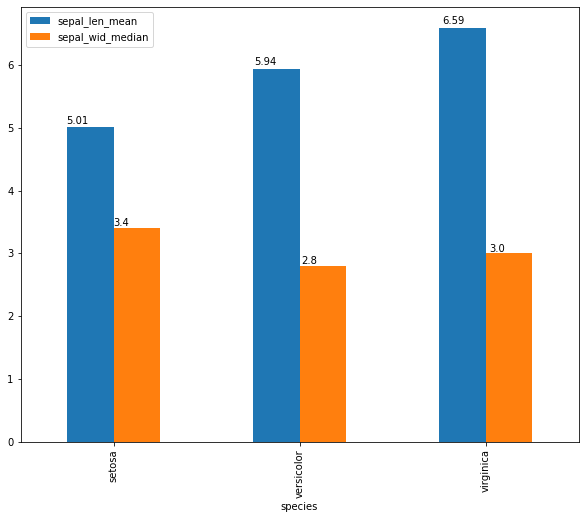

In [83]:
ax = df.groupby(['species']).agg(sepal_len_mean=('sepal_length','mean'),
                           sepal_wid_median=('sepal_width','median')).plot.bar(figsize=(10,8))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3}', (p.get_x() * 1.01, p.get_height() * 1.01))

Text(0, 0.5, 'Вид растения')

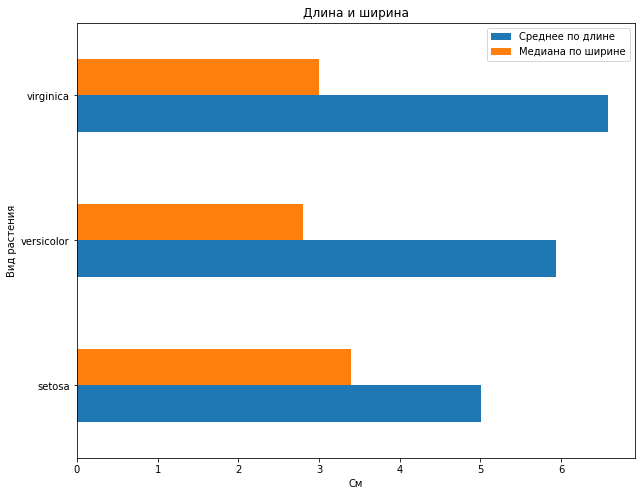

In [29]:
df.groupby(['species']).agg(sepal_len_mean=('sepal_length','mean'),
                           sepal_wid_median=('sepal_width','median')).plot.barh(figsize=(10,8))
plt.title('Длина и ширина')
plt.legend(['Среднее по длине','Медиана по ширине'])
plt.xlabel('См')
plt.ylabel('Вид растения')

### Метод `pie` для круговой диаграммы

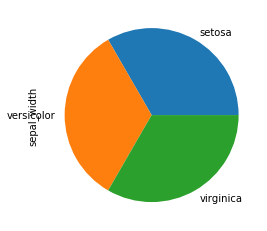

In [30]:
df.groupby(['species'])['sepal_width'].count().plot(kind='pie')

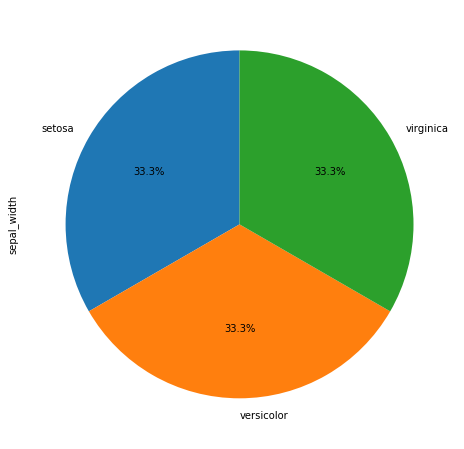

In [31]:
df.groupby(['species'])['sepal_width'].count().plot(kind='pie',startangle=90,autopct='%1.1f%%',figsize=(10,8))

### Всякие штуки в seaborn

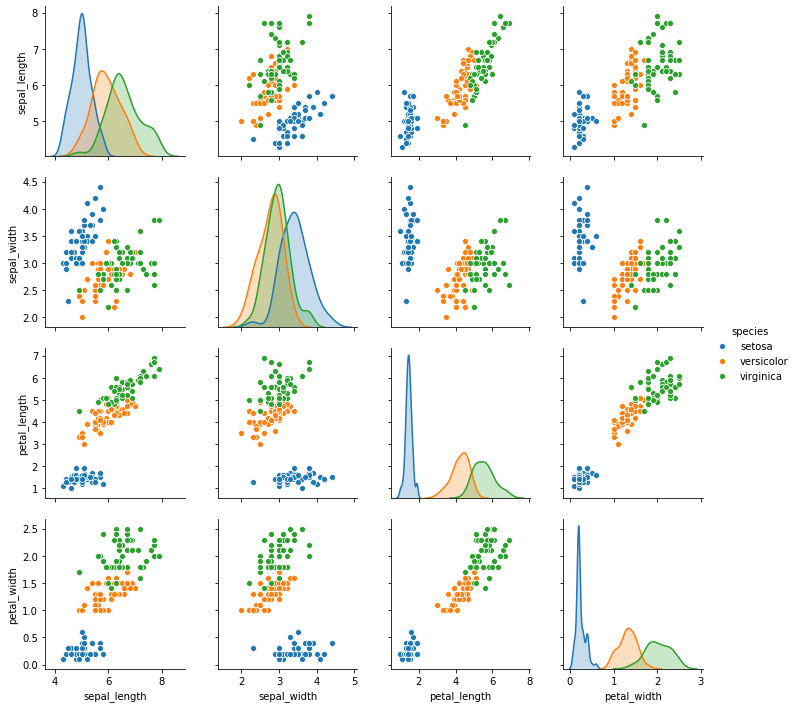

In [32]:
sns.pairplot(df,hue='species')

/Users/amakarov/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


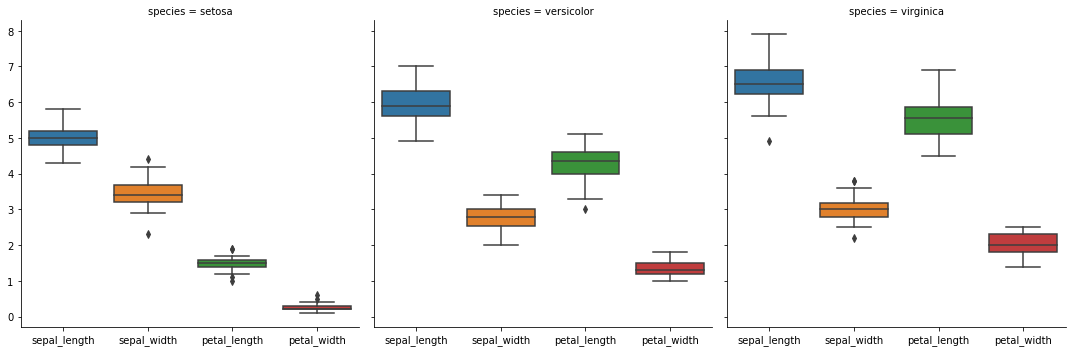

In [33]:
sns.factorplot(data=df,kind='box',col='species')

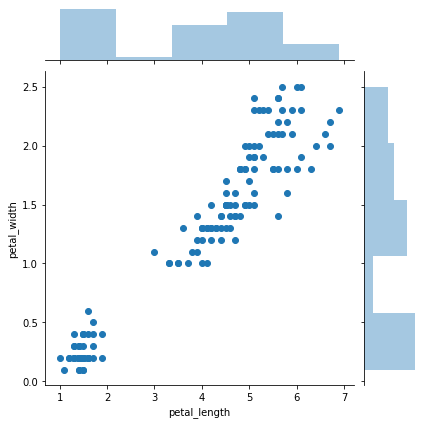

In [34]:
sns.jointplot(data=df,x='petal_length',y='petal_width')

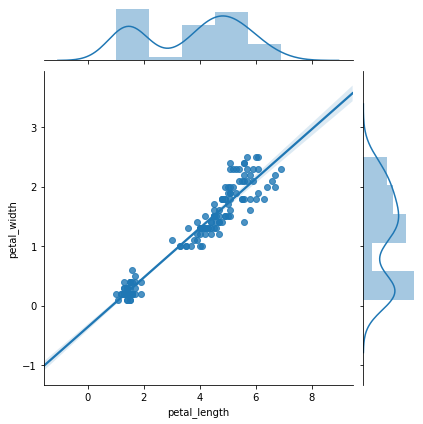

In [35]:
sns.jointplot(data=df,x='petal_length',y='petal_width',kind='reg')

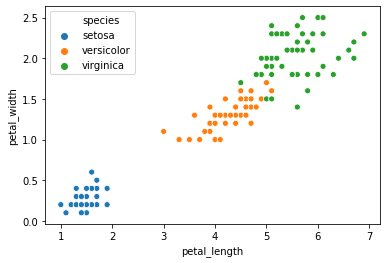

In [36]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species')

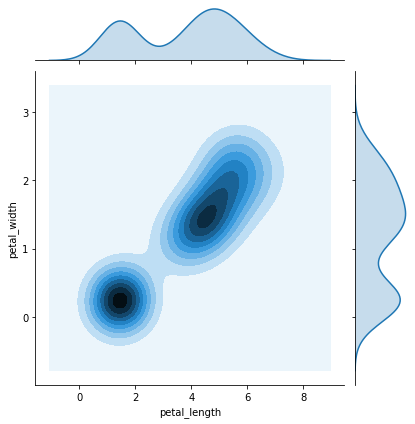

In [37]:
sns.jointplot(data=df,x='petal_length',y='petal_width',kind='kde')